<a href="https://colab.research.google.com/github/diegopenilla/PythonGuitar/blob/master/How_to_learn_guitar_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to learn guitar with Python

This is a shorter version of the article with all the code we need.


## Overview

The purpose of this tutorial is to create a program with which you can find the position of the notes of a given scale in the guitar. For that we will have to figure out methods to:
- Extract the notes composing a given scale.
- Locate where they are positioned in the strings of the guitar.
- Plot the strings and frets of the guitar along the notes of the scale. 

Let's start!

## Extracting Notes

An easy way to create chromatic scales (without typing them explicitly) is to concatenate a list with all the notes with itself and slice the desired elements. Let's see how:

In [0]:
# a sufficiently long list to take 12 notes out of any note
whole_notes = ['C' , 'C#', 'D', 'D#', 'E', 'F', 'F#' , 'G', 'G#', 'A', 'A#', 'B']*3

We concatenate three octaves worth of notes together and save it as whole_notes. Having a list like this allows us to easily slice chromatic scales, starting with any root. Let's see an example with B:

In [2]:
# index where element 'B' is located.
root = whole_notes.index('B')
# starting from this index, slice twelve elements
B = whole_notes[root:root+12]
print('B chromatic scale: ', B)

B chromatic scale:  ['B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#']


Now that we have an octave starting from B we can use the intervals of  scale to retrieve the B major scale:

In [3]:
# intervals of the major scale as indexes:
major_scale = [0, 2, 4, 5, 7, 9, 11]
# selecting the indexes of the octave we want
notes = [B[i] for i in major_scale]
print('B major scale:', notes)

B major scale: ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#']


If we want to retrieve the notes contained in another scale we do the same:

In [4]:
another_scale = [0, 2, 5, 10, 11]
notes = [B[i] for i in another_scale]
print('Some scale ', notes)

Some scale  ['B', 'C#', 'E', 'A', 'A#']


Hopefully now you can see where this is all going. Let's better write this a function for convenience: this summarizes all the code we've implemented so far:

In [0]:
def get_notes(key, intervals):
    """Given any key C, C#... B
       and intervals z.B Tone Tone Semitone"""
    root = whole_notes.index(key)
    octave = whole_notes[root:root+12]
    return [octave[i] for i in intervals]

- We create a chromatic scale (`octave`) starting at a given root.
- Then extract the notes specified by 1intervals`(the indexes of notes to be played) and return them in a list.

Now let's create a dictionary with common musical scales to make this more useful:

In [0]:
# Now given some intervals
scales = { 
    "major" : [0, 2, 4, 5, 7, 9, 11],
    "minor" : [0, 2 , 3, 5, 7,8, 10,],
    "dorian" : [0,  2,  3,  5,  7,  9, 10],
    "phrygian" : [0, 1, 3, 5, 7, 8, 10 ],
    "minor_pentatonic" : [0, 3, 5, 7, 10],
    "major_pentatonic" : [0, 2, 4, 7, 9],
    "harmonic_minor" : [0, 2, 3, 5, 7, 8, 10,],
    "aeolian" : [0, 2, 3, 5, 7, 8, 10,],
    "minor_blues" : [0, 3, 5, 6, 7, 10],
    "locrian" : [0, 1, 3, 5, 6, 8, 10,],
    "lydian" :[0, 2, 4, 6, 7, 9, 11,],
}

Using this dictionary, we now have an easy way of accessing the notes of any scale, starting at any root as seen below:

In [7]:
print('Notes of C major scale:\n{}'.format(get_notes('C', scales['major'])))
print('Notes of B minor scale:\n{}'.format(get_notes('B', scales['minor'])))
print('Notes of F# locrian scale:\n{}'.format(get_notes('F#', scales['locrian'])))

Notes of C major scale:
['C', 'D', 'E', 'F', 'G', 'A', 'B']
Notes of B minor scale:
['B', 'C#', 'D', 'E', 'F#', 'G', 'A']
Notes of F# locrian scale:
['F#', 'G', 'A', 'B', 'C', 'D', 'E']


## Creating the Guitar

We're almost done! Now that we have a way of accessing the notes of a scale, let's create a guitar to visualize them. This will involve representing the strings of the guitar as a dictionary. Let's see how we can implement this:

In [8]:
# Creating strings of guitar
start_strings = []
strings = {i:0 for i in 'EADGB'}
for i in strings.keys():
    start = whole_notes.index(i)
    strings[i] = whole_notes[start:start+20]
print(strings.keys())

dict_keys(['E', 'A', 'D', 'G', 'B'])


Using this dict, we can access notes in any string:

In [9]:
print('Notes in the E string: ', strings['E'])
print('Notes in the D string: ', strings['D'])

Notes in the E string:  ['E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
Notes in the D string:  ['D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A']


By having the notes in the strings in this manner. We are now able to match them with the notes of our scales to find their position.

## Finding notes in the guitar

To record the positions of the notes we will be creating yet another dictionary. For each note in a given scale we will add the position(index) where it is located in each string of the guitar. For this we will be doing the same we've been doing so far, accessing elements of lists using indexes.

In [0]:
def find_notes(scale):
    notes_strings = {i:0 for i in "EADGB"}
    # for every string 
    for key in strings.keys():
        # we create an empty list of indexes
        indexes = []
        for note in scale:
            # append index where note of the scale is found in
            ind = strings[key].index(note)
            indexes.append(ind)
            # because there are 20 frets, there are duplicate notes in the string
            if ind <= 7:
                # we must also append these to indexes
                indexes.append(ind+12)
        notes_strings[key] = indexes
    return notes_strings

Only little detail we have to pay attention to is that because the our strings contain 20 and not 12 notes, some notes are repeated. As we saw before by printing `strings['E']`, all the notes from E to B are repeated twice. The last note to be repeated: B,  is at indexes 7 and 19. So, for all notes found in the strings at an index 7 or less we must add its duplicate index. 

Calling the function returns a dictionary with the name of the strings as keys and the position of notes in the specified scale as values.

In [11]:
# finding notes in a scale:
C_minor_blues = get_notes('C', scales['minor_blues'])
# finding positions of these notes in the guitar, as a dict
positions = find_notes(C_minor_blues)
print('Position of C minor blues in the guitar:')
for i in positions.keys():
    print('Notes in the {} string {}'.format(i, positions[i]))

Position of C minor blues in the guitar:
Notes in the E string [8, 11, 1, 13, 2, 14, 3, 15, 6, 18]
Notes in the A string [3, 15, 6, 18, 8, 9, 10, 1, 13]
Notes in the D string [10, 1, 13, 3, 15, 4, 16, 5, 17, 8]
Notes in the G string [5, 17, 8, 10, 11, 0, 12, 3, 15]
Notes in the B string [1, 13, 4, 16, 6, 18, 7, 19, 8, 11]


Now that we  have easy access to this information we are finally able to plot this in the guitar :).

## Plotting Guitar

Displaying a guitar involves several steps:

- Plotting the strings E, A,D,G,B and high E as horizontal lines in a 2D plot at different heights y=1, 2, 3, 4, 5, 6. (For loop line 9 ).
- Plotting the frets of the guitar as vertical lines. (For loop line 12).
- Finding the position of notes for our desired scale using the function find_notes from before and saving them as a dictionary to_plot.
- Creating circles with labels inside to represent the notes and their location in the guitar. (Nested for loop lines 28, 29).

I also added some non-essential code to make it look cooler. Make sure to check the comments if you are curious.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def plot(key, intervals, night=True):
    scale = get_notes(key, intervals)
    # Plot Strings
    fig, ax = plt.subplots(figsize=(20,6))
    background = ['white', 'black']
    for i in range(1,7):
        ax.plot([i for a in range(22)])
    # Plotting Frets
    for i in range(1,21):
        if i == 12:
            ax.axvline(x=i, color='gray', linewidth=3.5)
            continue
        ax.axvline(x=i, color=background[night-1], linewidth=0.5)
    
    #ax.grid(linestyle='-', linewidth='0.5', color='black')
    ax.set_axisbelow(True)
    
    # setting height and width of displayed guitar
    ax.set_xlim([0.5, 21])
    ax.set_ylim([0.4, 6.5])
    ax.set_facecolor(background[night])
    to_plot = find_notes(scale)
    
    # ACHTUNG!!!
    for y_val, key in zip([1,2,3,4,5,6], 'EADGBE'):
        for i in to_plot[key]:
            font = 12
            x = i+0.5  # /figheight
            p = mpatches.Circle((x, y_val), 0.2)
            ax.add_patch(p)
            note = strings[key][i]
            # if note is root make it a bit bigger
            if note == scale[0]:
                font=14.5
            ax.annotate(note, (i+0.5, y_val), color='w', weight='bold', 
                            fontsize=font, ha='center', va='center')
                
    plt.title('_| _| _| _| _|'*16)
    plt.yticks(np.arange(1,7), ['E', 'A', 'D', 'G', 'B', 'E'])
    plt.xticks(np.arange(21)+0.5, np.arange(0,22))
    plt.show()

Here is the end result of this little adventure: by calling the function plot and specifying a root and a scale, we can display a matplotlib guitar with the info we need to play along :D.

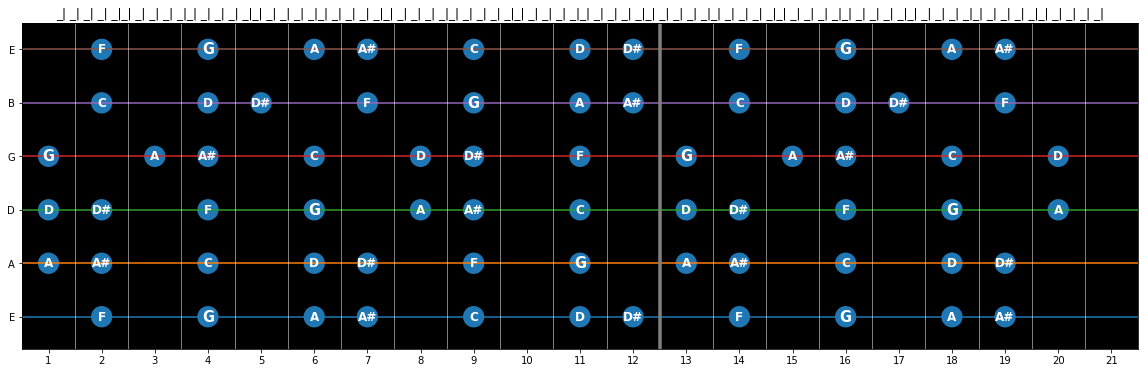

In [13]:
plot('G', scales['minor'])

We can also use Forms in colab  to make this easier to use. Just change the options, run the cell and call the plot the plot again.


In [0]:
#@title Display Guitar
Root = 'C#' #@param ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
Scale = 'major' #@param ['major','minor','dorian','phrygian','minor_pentatonic','major_pentatonic','harmonic_minor','aeolian','minor_blues','locrian','lydian']

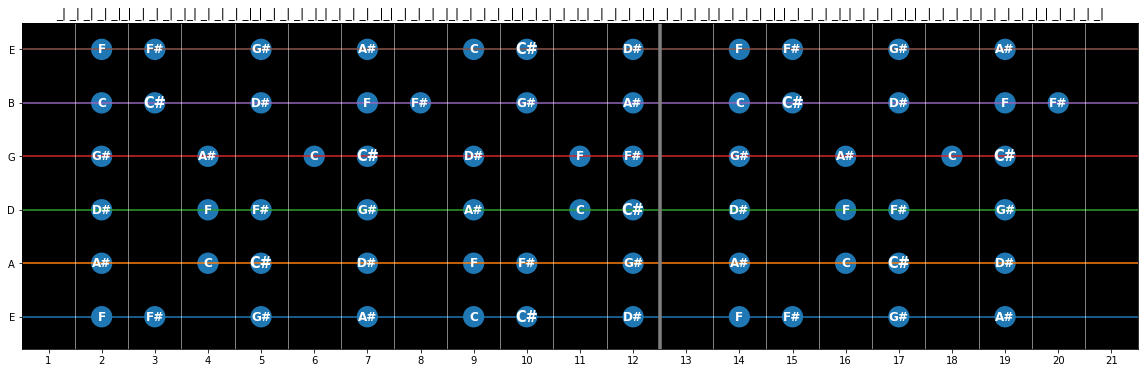

In [15]:
plot(Root, scales[Scale])

That's it! I hope you someone actually plays the guitar with this :D.